In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:

df= pd.read_csv('iris.csv')
print("Data imported successfully")

df.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


task: predict the obtimum number of clusters and present it visually 
for the task we are using : Elbow Method

To complete task intially drop two columns: id and species . Column id is dropped since id represents unique values and while creating clusters it focus on the relationship,similarities between the data and the id column doesnt make much more sense here
and futher drop species column since species column seems to be target variable as it is represented as result or outcome 

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df.drop(['Id','Species'],axis=1)

In [4]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [5]:
#standerize the feature
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [6]:
#perform k clustering for each values of k 
inertia_values=[] #gap between the values in the clusters 
k_values=range(1,11) #jati lida ni hunxa range 
for k in k_values:
    #for each k there is k clustering model
    kmeans = KMeans(n_clusters=k, random_state=42) # aba cluster 1 banne vyo first iteration ma and random_state is for reduceability
    #reduceability vneko eutae data ko sath ma clustering model create gariyo each time vne tyo similar hune chance hunxa or vnum 
    #consistent hunxa
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

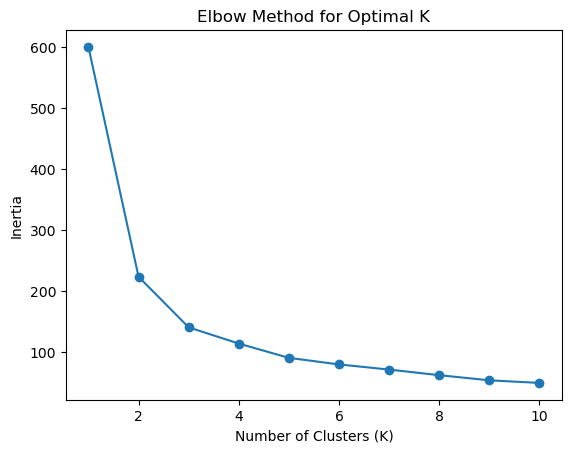

In [7]:
plt.plot(k_values,inertia_values,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()